<a href="https://colab.research.google.com/github/SHAIKSHAFINA/Autism-Prediction-using-Machine-Learning/blob/main/Autism_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Importing the dependencies**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2.Data Loading & Understanding**

In [46]:
# read the csv data to a pandas dataframe
df = pd.read_csv("/content/train.csv")

Initial Inspection

In [47]:
df.shape

(800, 22)

In [48]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [49]:
df.tail()


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [50]:
# display all colujmns of a dataframe
pd.set_option('display.max_columns' , None)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [52]:
# convert age column datatype to integer
df["age"] = df["age"].astype(int)

In [53]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [54]:
for col in df.columns:
  numerical_features =["ID" ,"age" ,"result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [55]:
# dropping id & age_desc colujmn
df=df.drop(columns=["ID" , "age_desc"])

In [56]:
df.shape


(800, 20)

In [57]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [58]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [59]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [60]:
# define the mapping dictionary for country names

mapping ={
    "Viet Nam":"Vietnam" ,
    "AmericanSamoa":"United States" ,
    "Hong Kong" : "China"
}

# replace value in the country column
df["contry_of_res"]= df["contry_of_res"].replace(mapping)

In [61]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [62]:
# target class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**Insights**
1.Missing values in etnicity & relation
2.age_desc column has only 1 unique value.so it is removed as it is not imp for prediction
3.Fixed Country names
4.identified class imbalance in the target column

3.Exploratory Data Analysis(EDA)

In [63]:
df.shape

(800, 20)

In [64]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [65]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [66]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Univariate Analysis

Numerical Columns:
- age
- result

In [67]:
# set the desired theme

Distribution Plots

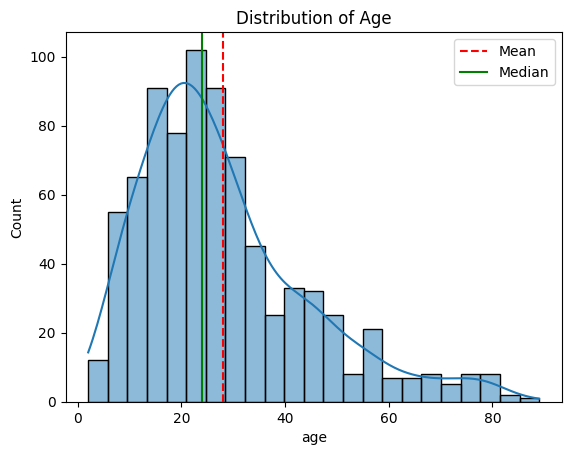

In [68]:
# Histogram for age

sns.histplot(df["age"] , kde=True)
plt.title("Distribution of Age")

# cal mean & median

age_mean = df["age"].mean()
age_median = df["age"].median()

# add mean & median line

plt.axvline(age_mean , color="red" , linestyle="--" , label="Mean" )
plt.axvline(age_median , color="green" , linestyle="-" , label ="Median")

plt.legend()
plt.show()

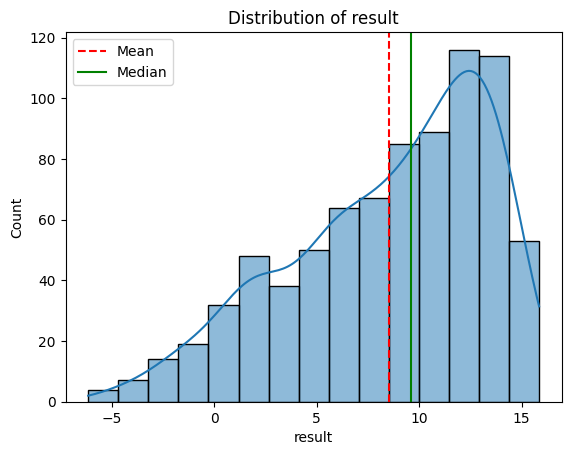

In [69]:
# Histogram for result

sns.histplot(df["result"] , kde=True)
plt.title("Distribution of result")

# cal mean & median

result_mean = df["result"].mean()
result_median = df["result"].median()

# add mean & median line

plt.axvline(result_mean , color="red" , linestyle="--" , label="Mean" )
plt.axvline(result_median , color="green" , linestyle="-" , label ="Median")

plt.legend()
plt.show()

**Box plots for identifying outliers in the numerical columns**

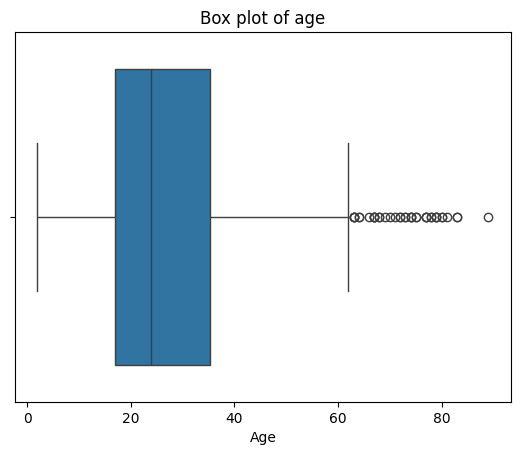

In [70]:
# box plot

sns.boxplot( x=df["age"])
plt.title("Box plot of age")
plt.xlabel("Age")
plt.show()

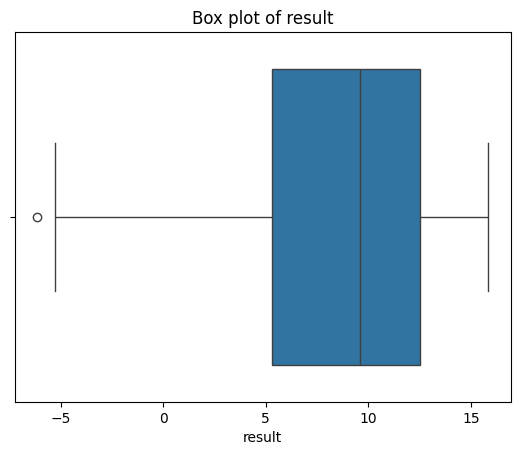

In [71]:
# box plot

sns.boxplot( x=df["result"])
plt.title("Box plot of result")
plt.xlabel("result")
plt.show()

In [72]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers= df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
print("Number of outliers in age column:", len(age_outliers))

Number of outliers in age column: 39


In [73]:
# count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers= df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]
print("Number of outliers in result column:", len(result_outliers))

Number of outliers in result column: 1


Univariate Analysis of categorical columns

In [74]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

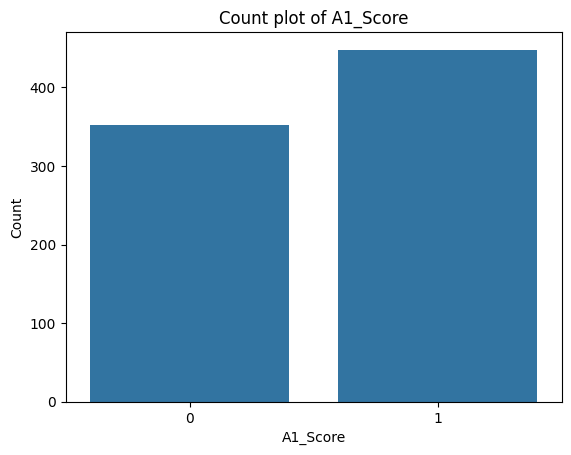

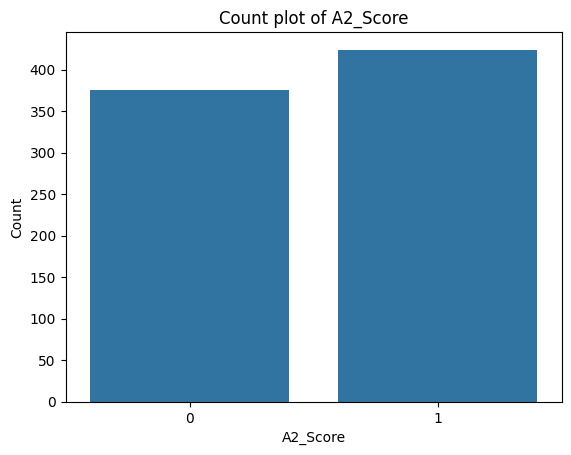

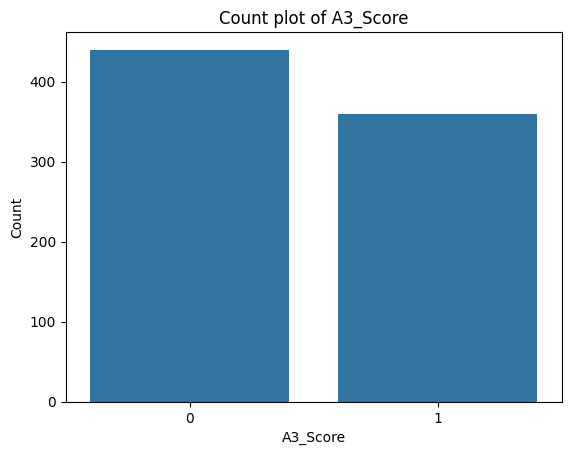

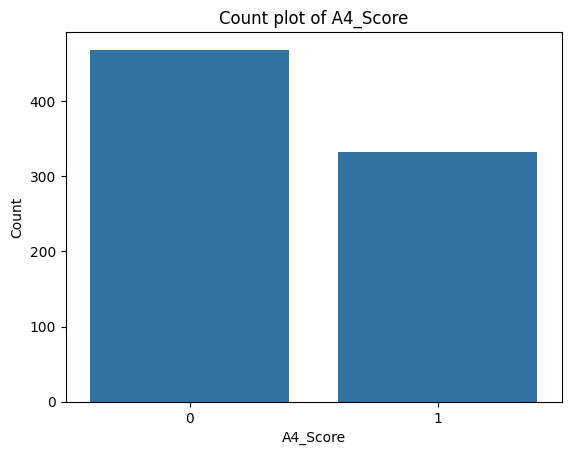

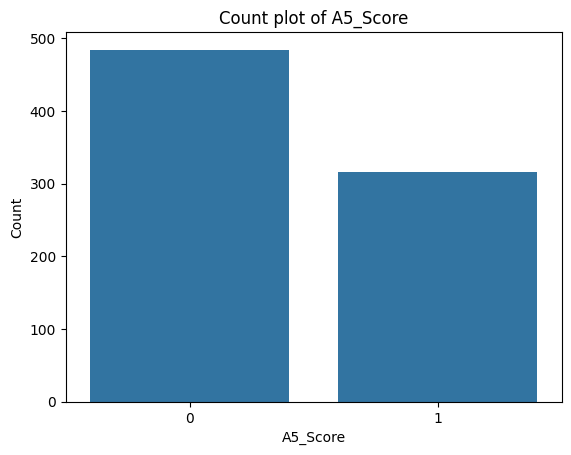

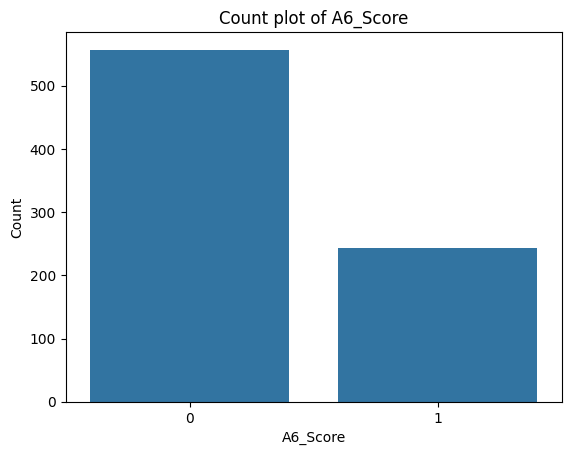

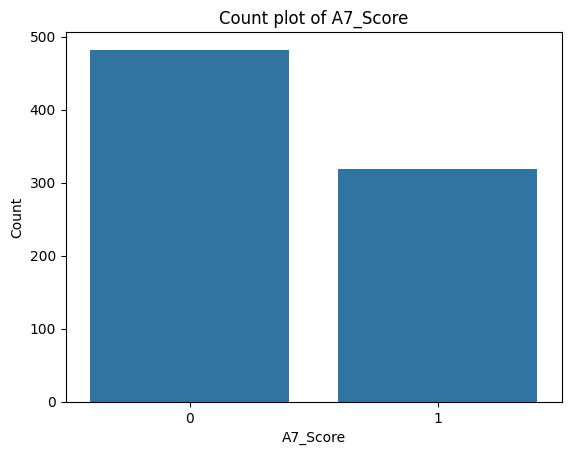

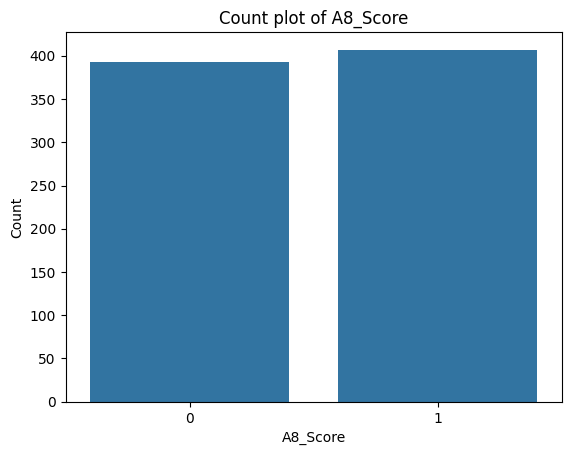

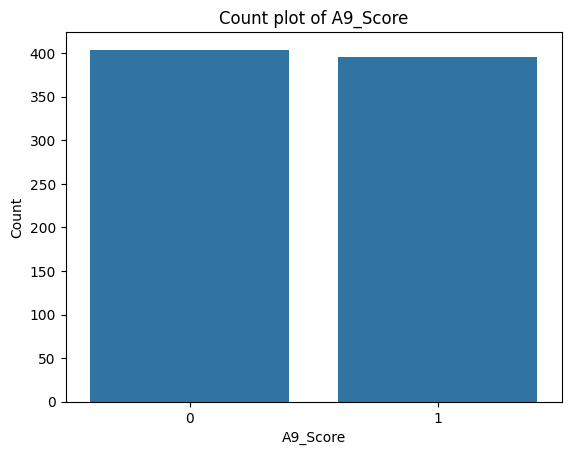

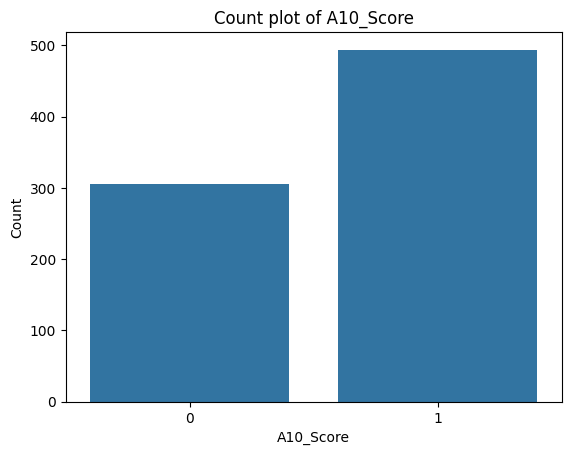

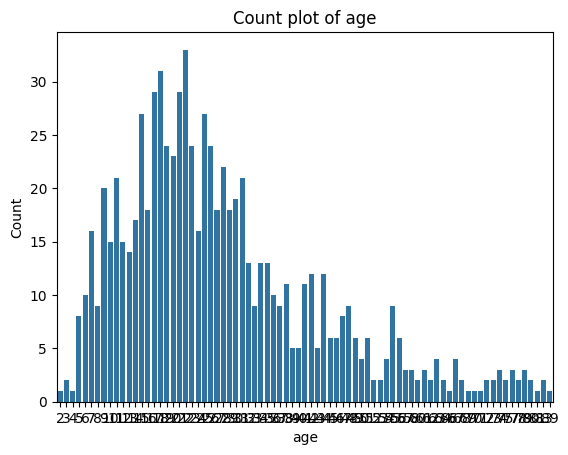

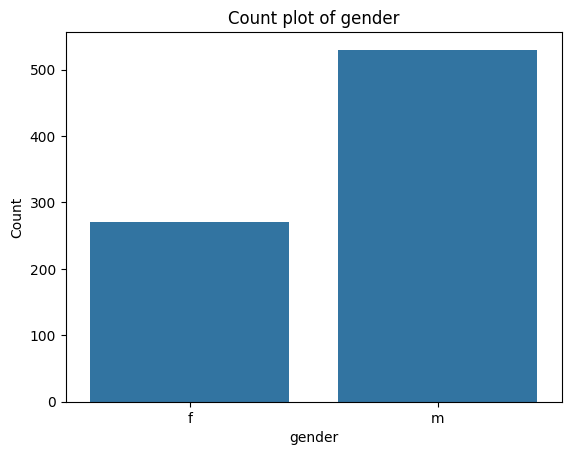

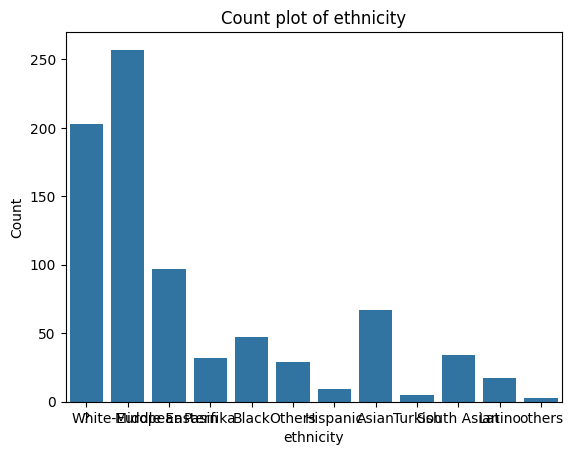

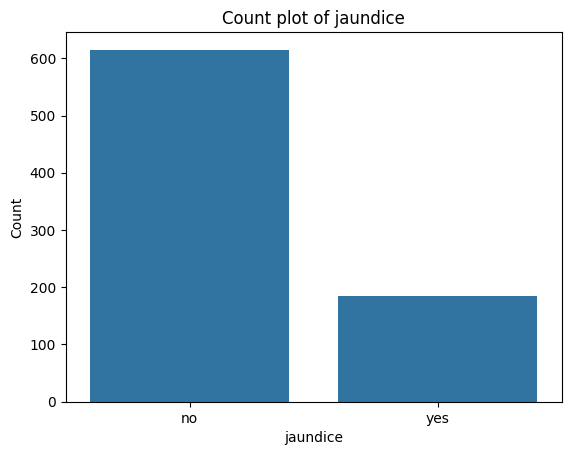

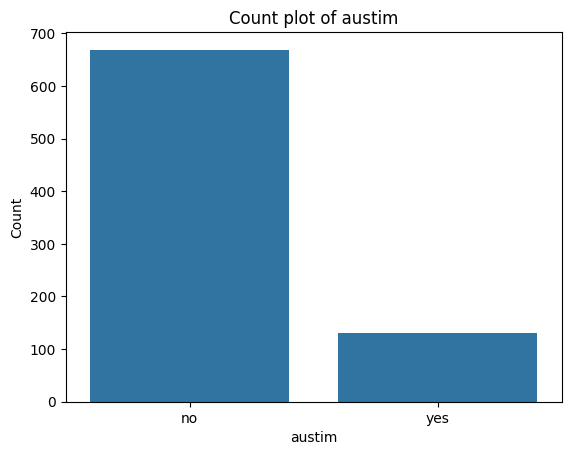

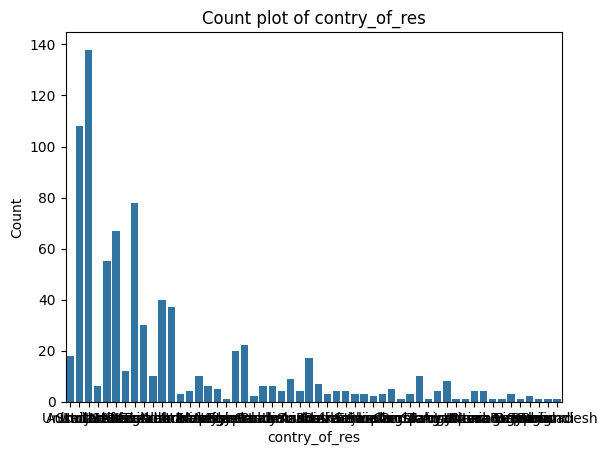

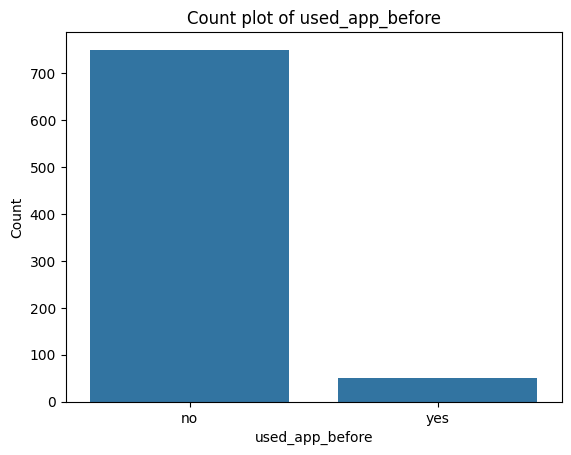

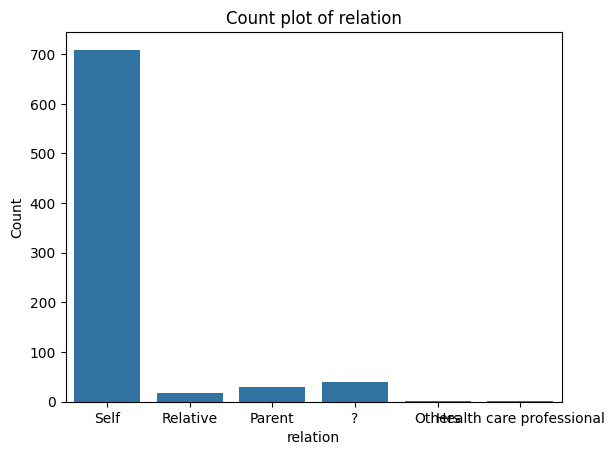

In [75]:
categorical_columns =['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f"Count plot of {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

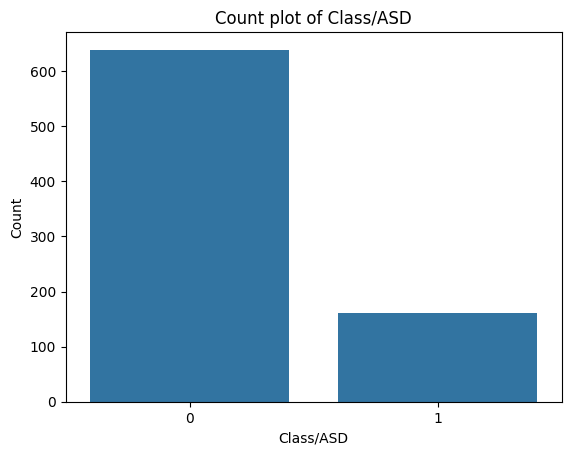

In [76]:
# countplot for  target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count plot of Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [77]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


Handle missing values in ethnicity and relation col

In [78]:
df["ethnicity"] = df["ethnicity"].replace({"?" :"Others" , "others" : "Others"})

In [79]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [80]:
df["relation"] = df["relation"].replace({"?" :"Others" ,
                                         "Relative" : "Others" ,
                                          "Parent":"Others" ,
                                         "Health care professional" :"Others"
                                        })

In [81]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [82]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


Label Encoding

In [83]:
#identify col with obj DT

object_columns = df.select_dtypes(include=["object"]).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [84]:
#intialize a dictionary to store the encoders

encoders = {}

# apply label encoding and store the encoders

for column in object_columns:
  encoder = LabelEncoder()
  df[column] = encoder.fit_transform(df[column])
  encoders[column] = encoder

  #save encoder as pickle file
  with open("encoder.pkl" , "wb") as f:
    pickle.dump(encoder , f)

In [85]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [86]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


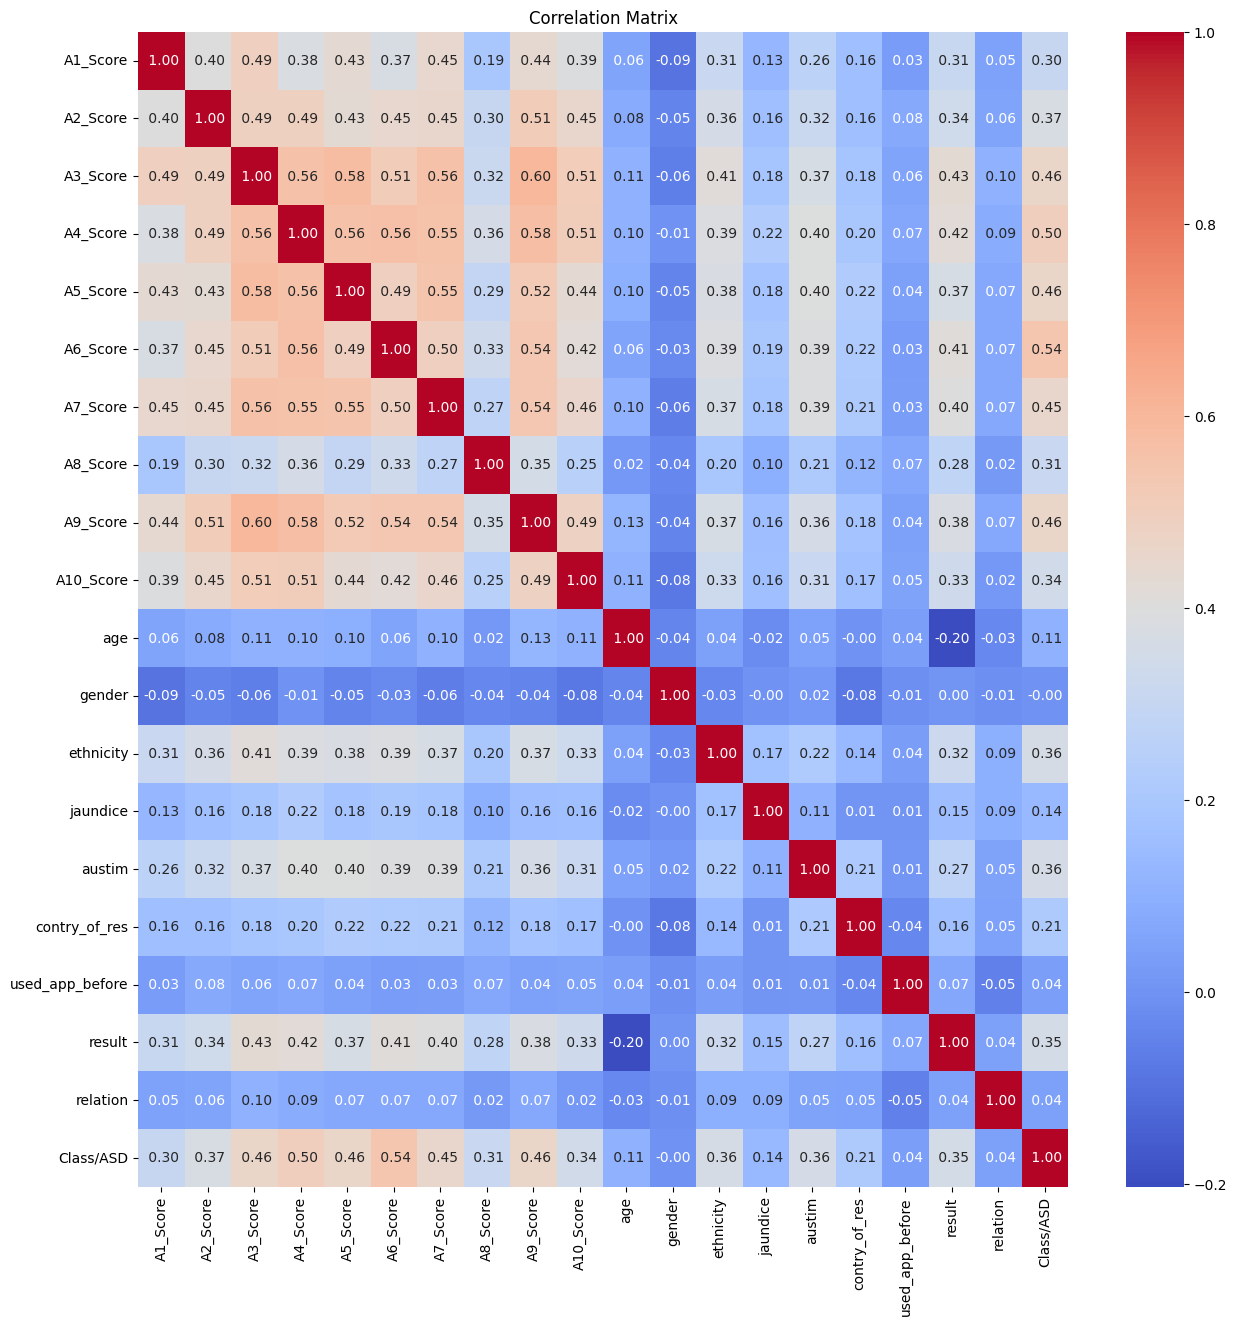

In [87]:
#correlation matrix

plt.figure(figsize=(15,15))
sns.heatmap(df.corr() , annot=True , cmap="coolwarm" ,fmt=" .2f")
plt.title("Correlation Matrix")
plt.show()

Insights from EDA

- There are few outliers in the numerical columns(age, results)
-There i a class imbalance in the  target column
- we don't have any high correlated column
-performed label encoding and saved the encoders

4.Data Preprocessing

handling the outliers

In [88]:
# function to replace the utiliers with median
def replace_outliers_with_median(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  #replace outliers with median value
  df[column] =df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
  return df

In [89]:
#replace outliers in the "age" column
df=replace_outliers_with_median(df , "age")
#replace outliers in the "result" column
df=replace_outliers_with_median(df , "result")

In [90]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [91]:
df.shape

(800, 20)

**Train Test Split**

In [92]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [93]:
x=df.drop(columns=["Class/ASD"])
y=df["Class/ASD"]

In [95]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [96]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
print(x.shape , x_train.shape , x_test.shape)

(800, 19) (640, 19) (160, 19)


In [99]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [100]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


SMOTE(Synthetic Minority Oversampling Technique)

In [101]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [102]:
print(x_train_resampled.shape)
print(y_train_resampled.shape)

(1030, 19)
(1030,)


In [103]:
print(y_train_resampled.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


**Model Training**

In [105]:
#dictionary of classifiers
models ={
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "XGBoost" : XGBClassifier(random_state=42)
}

In [106]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)}


In [108]:
# dictionary to store the cross validation results

cv_scores ={}

#perform 5-fold cross validation

for model_name , model in models.items():
  print(f"training {model_name} with default parameters...")
  scores = cross_val_score(model , x_train_resampled , y_train_resampled , cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy : {np.mean(scores):.2f}")
  print("-"*50)

training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy : 0.86
--------------------------------------------------
training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy : 0.92
--------------------------------------------------
training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy : 0.90
--------------------------------------------------


In [109]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

6.Model Selection & HyperParameter Tuning

In [115]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgBoost_classifier = XGBClassifier(random_state=42)

In [112]:
#HyperParameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion" : ["gini" , "entropy"],
    "max_depth" : [None , 10 , 20 , 30],
    "min_samples_split" : [2 , 5 , 10],
    "min_samples_leaf" : [1 , 2 , 4]
}

param_grid_rf = {
    "n_estimators" : [50 , 100 , 200 , 500],
    "max_depth" : [None , 10 ,20,30],
    "min_samples_split" : [2 , 5 , 10],
    "min_samples_leaf" : [1 , 2 , 4],
    "bootstrap" : [True , False]
}

param_grid_xgb = {
    "n_estimators" : [50 , 100 ,200 , 500] ,
    "max_depth" : [3 , 5 , 7 , 10],
    "learning_rate" : [0.01 , 0.1 , 0.2 ,0.3],
    "subsample" : [0.5 , 0.7 , 1.0],
    "colsample_bytree" : [0.5 , 0.7 , 1.0]
}

In [116]:
# hyperParameter tuning for 3 tree based models

# the below steps can be automated by using a for loop or by using a pipeline

#perform RamdomizedSearchCV for each model

random_search_dt = RandomizedSearchCV(estimator=decision_tree , param_distributions=param_grid_dt , n_iter=20 , cv=5 , scoring="accuracy" , random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest , param_distributions=param_grid_rf , n_iter=20 , cv=5 , scoring="accuracy" , random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgBoost_classifier , param_distributions=param_grid_xgb , n_iter=20 , cv=5 , scoring="accuracy" , random_state=42)

In [117]:
random_search_dt.fit(x_train_resampled , y_train_resampled)
random_search_rf.fit(x_train_resampled , y_train_resampled)
random_search_xgb.fit(x_train_resampled , y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [119]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

print(random_search_xgb.best_estimator_)
print(random_search_xgb.best_score_)



DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
0.8776699029126214
RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
0.9271844660194175
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)
0.9116504854368932


In [120]:
# get the model with best score

best_model =None
best_score =0

if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
    best_score = random_search_rf.best_score_
    best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score:
    best_score = random_search_xgb.best_score_
    best_model = random_search_xgb.best_estimator_

In [121]:
print(f"Best Model :{best_model}" )
print(f"Best Cross-Validation Accuracy :{best_score:.2f}" )


Best Model :RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy :0.93


In [122]:
#Save the best Model

with open("best_model.pkl" , "wb") as f:
  pickle.dump(best_model , f)

**7.Evaluation**

In [124]:
#Evaluate on test data

y_test_pred = best_model.predict(x_test)
print("Accuracy score:\n" ,accuracy_score(y_test , y_test_pred))
print("Confusion Matrix:\n" , confusion_matrix(y_test , y_test_pred))
print("Classification Report:\n" , classification_report(y_test , y_test_pred))


Accuracy score:
 0.81875
Confusion Matrix:
 [[108  16]
 [ 13  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.59      0.64      0.61        36

    accuracy                           0.82       160
   macro avg       0.74      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160



To do:
- Build a Predictive System with encoders and model file
- See if you could improve the performance

In [126]:
import pickle
import pandas as pd

def predict_asd(new_data, model_path="best_model.pkl", encoders_path="encoder.pkl"):
    """
    Predicts the Class/ASD for new data using the trained model and encoders.

    Args:
        new_data (pd.DataFrame): DataFrame containing the new data to predict.
        model_path (str): Path to the saved model file.
        encoders_path (str): Path to the saved encoders file.

    Returns:
        np.ndarray: Predicted Class/ASD values for the new data.
    """
    # Load the best model
    with open(model_path, 'rb') as f:
        model = pickle.load(f)

    # Load the encoders
    with open(encoders_path, 'rb') as f:
        encoders = pickle.load(f)

    # Preprocess the new data (similar to the training data preprocessing)
    # Handle missing values/inconsistent entries in 'ethnicity' and 'relation'
    new_data["ethnicity"] = new_data["ethnicity"].replace({"?" :"Others" , "others" : "Others"})
    new_data["relation"] = new_data["relation"].replace({"?" :"Others" ,
                                         "Relative" : "Others" ,
                                          "Parent":"Others" ,
                                         "Health care professional" :"Others"
                                        })

    # Apply label encoding using the loaded encoders
    object_columns = new_data.select_dtypes(include=["object"]).columns
    for column in object_columns:
        if column in encoders:
            # Use the loaded encoder to transform new data
            new_data[column] = encoders[column].transform(new_data[column])
        else:
            # Handle unseen categories if necessary (e.g., by encoding as a new category or using a different strategy)
            # For simplicity, this example assumes all categories in new data were present in training data
            print(f"Warning: Unseen category in column '{column}'. Handle appropriately.")


    # Handle outliers in 'age' and 'result' (using the median from the training data)
    # You would need to save the medians from the training data during preprocessing
    # For now, we'll use the medians calculated earlier in the notebook
    age_median = 24.0 # Replace with the actual median from your training data
    result_median = 9.605299308 # Replace with the actual median from your training data

    Q1_age = df["age"].quantile(0.25) # Assuming df is still available from previous steps
    Q3_age = df["age"].quantile(0.75)
    IQR_age = Q3_age - Q1_age
    lower_bound_age = Q1_age - 1.5 * IQR_age
    upper_bound_age = Q3_age + 1.5 * IQR_age
    new_data["age"] =new_data["age"].apply(lambda x: age_median if x < lower_bound_age or x > upper_bound_age else x)


    Q1_result = df["result"].quantile(0.25) # Assuming df is still available from previous steps
    Q3_result = df["result"].quantile(0.75)
    IQR_result = Q3_result - Q1_result
    lower_bound_result = Q1_result - 1.5 * IQR_result
    upper_bound_result = Q3_result + 1.5 * IQR_result
    new_data["result"] =new_data["result"].apply(lambda x: result_median if x < lower_bound_result or x > upper_bound_result else x)


    # Make predictions
    predictions = model.predict(new_data)

    return predictions

Let's try training a Logistic Regression model.

In [127]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear solver for smaller datasets

# Train the model on the resampled training data
print("Training Logistic Regression model...")
logistic_regression_model.fit(x_train_resampled, y_train_resampled)
print("Training complete.")

# Evaluate the model on the test data
y_test_pred_lr = logistic_regression_model.predict(x_test)

print("\n--- Logistic Regression Model Evaluation ---")
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_test_pred_lr))

Training Logistic Regression model...
Training complete.

--- Logistic Regression Model Evaluation ---
Accuracy score:
 0.83125
Confusion Matrix:
 [[103  21]
 [  6  30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       124
           1       0.59      0.83      0.69        36

    accuracy                           0.83       160
   macro avg       0.77      0.83      0.79       160
weighted avg       0.86      0.83      0.84       160



Let's perform hyperparameter tuning for the Logistic Regression model.

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, solver='liblinear')

# Hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'penalty': ['l1', 'l2'] # Type of regularization
}

# Perform RandomizedSearchCV for Logistic Regression
random_search_lr = RandomizedSearchCV(
    estimator=logistic_regression_model,
    param_distributions=param_grid_lr,
    n_iter=10, # Number of parameter settings that are sampled
    cv=5, # 5-fold cross-validation
    scoring='accuracy', # Metric to evaluate the model
    random_state=42,
    n_jobs=-1 # Use all available cores
)

print("Performing RandomizedSearchCV for Logistic Regression...")
random_search_lr.fit(x_train_resampled, y_train_resampled)
print("RandomizedSearchCV complete.")

# Print the best parameters and best score
print("\nBest parameters found:", random_search_lr.best_params_)
print("Best cross-validation accuracy:", random_search_lr.best_score_)

# Evaluate the best model on the test data
best_lr_model = random_search_lr.best_estimator_
y_test_pred_tuned_lr = best_lr_model.predict(x_test)

print("\n--- Tuned Logistic Regression Model Evaluation ---")
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred_tuned_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_tuned_lr))
print("Classification Report:\n", classification_report(y_test, y_test_pred_tuned_lr))

Performing RandomizedSearchCV for Logistic Regression...
RandomizedSearchCV complete.

Best parameters found: {'penalty': 'l2', 'C': 0.1}
Best cross-validation accuracy: 0.8504854368932039

--- Tuned Logistic Regression Model Evaluation ---
Accuracy score:
 0.84375
Confusion Matrix:
 [[103  21]
 [  4  32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       124
           1       0.60      0.89      0.72        36

    accuracy                           0.84       160
   macro avg       0.78      0.86      0.81       160
weighted avg       0.88      0.84      0.85       160

